In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

class MazeEnv:
    def __init__(self):
        self.grid = np.array([
            [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 3, 0],
            [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0],
            [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
            [0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0],
            [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
            [0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0],
            [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
            [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0],  # 4 = bomba!
            [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
            [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # hedef 2 burada
        ])
        self.original_grid = self.grid.copy()

        self.start_pos = (0, 0)
        self.reset()

    def reset(self):
        self.grid = self.original_grid.copy()  # grid'i sıfırla 
        while True:
            x, y = np.random.randint(15), np.random.randint(15)
            if self.grid[x, y] == 0:
                self.agent_pos = (x, y)
                return self.agent_pos
           

    def step(self, action):
        x, y = self.agent_pos
        new_pos = {
            0: (x-1, y),  # up
            1: (x+1, y),  # down
            2: (x, y-1),  # left
            3: (x, y+1),  # right
        }[action]

        reward = -1
        done = False

        if (0 <= new_pos[0] < 15) and (0 <= new_pos[1] < 15):
            cell = self.grid[new_pos]
            if cell != 1:  # duvar değilse
                self.agent_pos = new_pos
                if cell == 2:  # gerçek hedef
                    reward = 100
                    done = True
                elif cell == 3:  # sahte hedef
                    reward = 5
                    self.grid[new_pos] = 0
                elif cell == 4:  # bomba
                    reward = -50
                    done = True
            else:
                reward = -5
        else:
            reward = -5

        return self.agent_pos, reward, done


    def render(self):
        cmap = mcolors.ListedColormap([
            'white',   # 0: boş
            'black',   # 1: duvar
            'green',   # 2: gerçek hedef
            'orange',  # 3: sahte hedef
            'purple',  # 4: bomba
            'red',     # 5: ajan
            'blue'     # 6: ajan hedefte
        ])
        norm = mcolors.BoundaryNorm([0, 1, 2, 3, 4, 5, 6, 7], cmap.N)

        grid_copy = self.grid.copy()
        x, y = self.agent_pos

        if grid_copy[x, y] == 2:
            grid_copy[x, y] = 6  # ajan hedefte
        else:
            grid_copy[x, y] = 5  # ajan konumu

        plt.figure(figsize=(7, 7))
        plt.imshow(grid_copy, cmap=cmap, norm=norm)

        plt.xticks([]), plt.yticks([])
        plt.grid(False)
        plt.title("Maze Env - Ajanın Anlık Konumu")
        plt.show()

    def render_path(self, path):

        cmap = mcolors.ListedColormap([
        'white',   # 0: boş
        'black',   # 1: duvar
        'green',   # 2: gerçek hedef
        'orange',  # 3: sahte hedef
        'purple',  # 4: bomba
        'gray',    # 5: izlediği yol
        'red',     # 6: son konum
        'blue'     # 7: ajan hedefte bitti
    ])
        norm = mcolors.BoundaryNorm([0, 1, 2, 3, 4, 5, 6, 7, 8], cmap.N)

        grid_copy = self.grid.copy()

        for x, y in path:
            if grid_copy[x, y] == 0:
                grid_copy[x, y] = 5  # path izi

        x, y = path[-1]
        if self.grid[x, y] == 2:
            grid_copy[x, y] = 7  # ajan hedefte bitirdi
        else:
            grid_copy[x, y] = 6  # ajan final pozisyonu

        plt.figure(figsize=(7, 7))
        plt.imshow(grid_copy, cmap=cmap, norm=norm)

        plt.xticks([]), plt.yticks([])
        plt.grid(False)
        plt.title("Maze Env - Ajanın İzlediği Yol")
        plt.show()


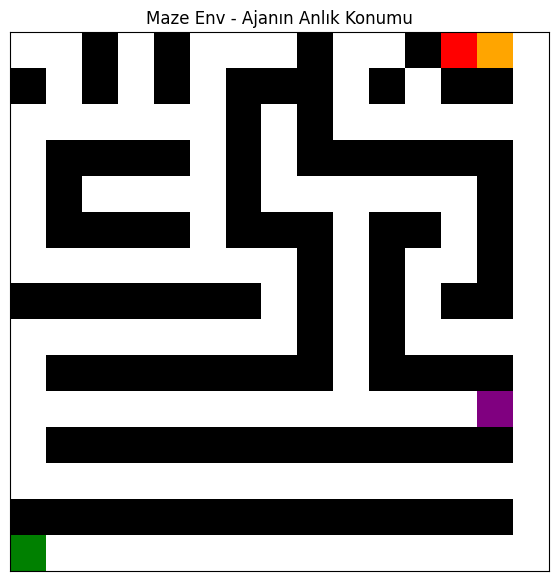

In [3]:
env = MazeEnv()
env.reset()
env.render()


In [4]:
alpha = 0.1          # öğrenme oranı (çok küçük yaparsan öğrenemez)
gamma = 0.99         # geleceğe bakış (uzun vadeli düşünmek için yüksek tut)
epsilon = 1.0        # başlangıçta bol bol keşfet
epsilon_min = 0.05   # az da olsa keşif hep devam etsin
epsilon_decay = 0.995  # yavaş yavaş azalt
episodes = 3000
max_steps = 200    # çok yüksek tutma, yoksa hedefe tesadüfi varır



In [5]:
q_table = {}
for x in range(15):
    for y in range(15):
        q_table[(x, y)] = np.zeros(4)


Episode 0, Reward: 59, Epsilon: 0.050


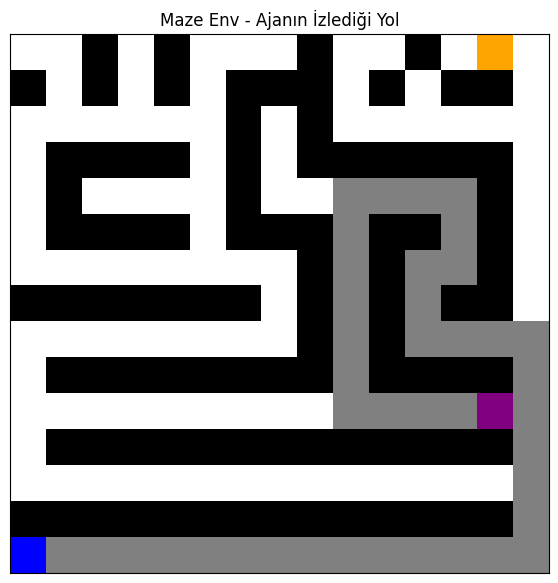

Episode 1000, Reward: 98, Epsilon: 0.050


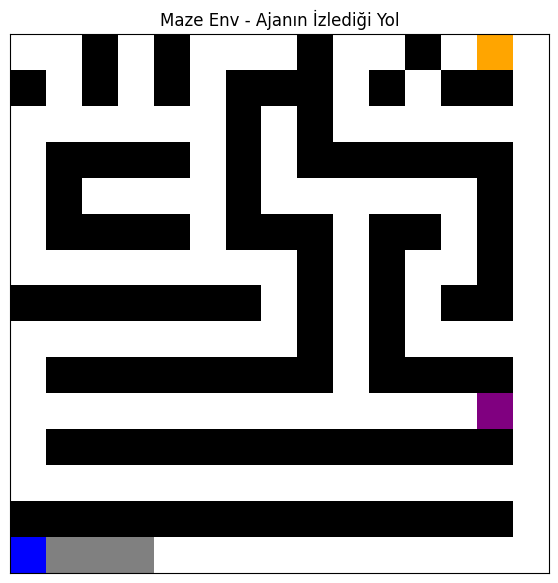

Episode 2000, Reward: 81, Epsilon: 0.050


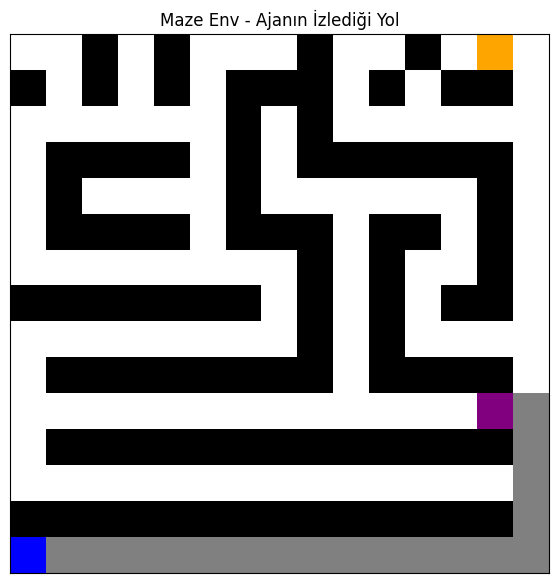

In [7]:
episode_rewards = []

for episode in range(episodes):
    state = env.reset()
    total_reward = 0
    done = False
    path = [state]

    for step in range(max_steps):
        # Epsilon-greedy aksiyon seçimi
        if np.random.rand() < epsilon:
            action = np.random.randint(4)
        else:
            action = np.argmax(q_table[state])

        next_state, reward, done = env.step(action)
        total_reward += reward
        path.append(next_state)

        # Q-table güncelle
        old_value = q_table[state][action]
        next_max = np.max(q_table[next_state])
        q_table[state][action] = old_value + alpha * (reward + gamma * next_max - old_value)

        state = next_state
        if done:
            break

    episode_rewards.append(total_reward)

    # Epsilon decay
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

    # Görselleştirme
    if episode % 1000 == 0:
        print(f"Episode {episode}, Reward: {total_reward}, Epsilon: {epsilon:.3f}")
        env.render_path(path)


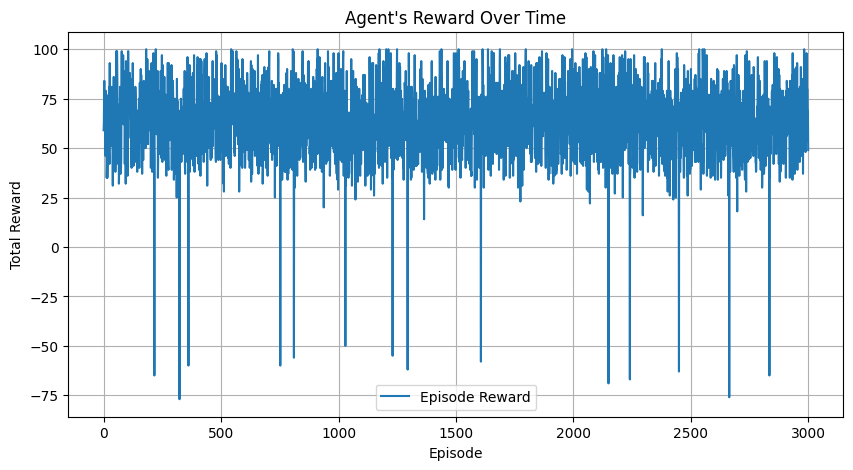

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(episode_rewards, label="Episode Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Agent's Reward Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
def test_agent(env, q_table, max_steps=100, render=True):
    state = env.reset()
    path = [state]
    total_reward = 0

    for step in range(max_steps):
        # Keşif yok → direkt en iyi aksiyonu seç
        action = np.argmax(q_table[state])
        next_state, reward, done = env.step(action)
        path.append(next_state)
        total_reward += reward
        state = next_state

        if done:
            break

    if render:
        env.render_path(path)

    print(f"Test tamamlandı. Total reward: {total_reward}")
    return total_reward, path



📦 Test 1


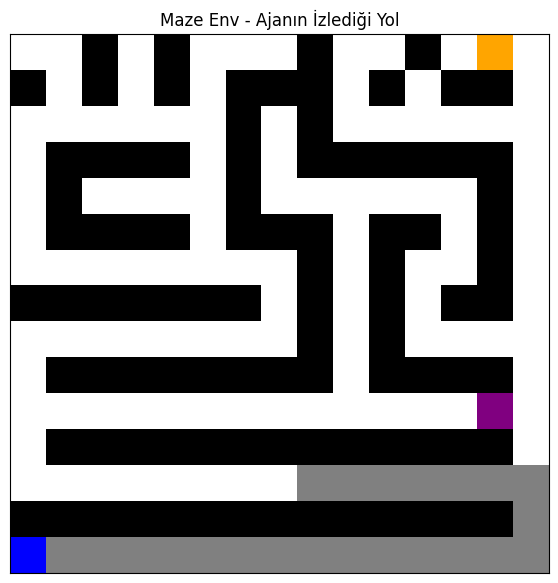

Test tamamlandı. Total reward: 79
Reward: 79

📦 Test 2


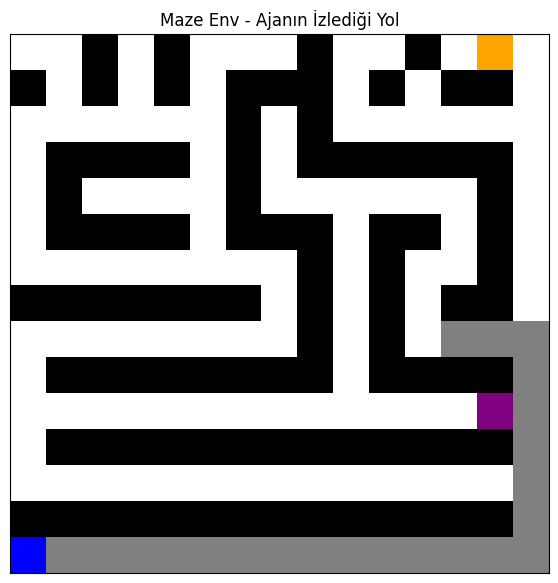

Test tamamlandı. Total reward: 79
Reward: 79

📦 Test 3


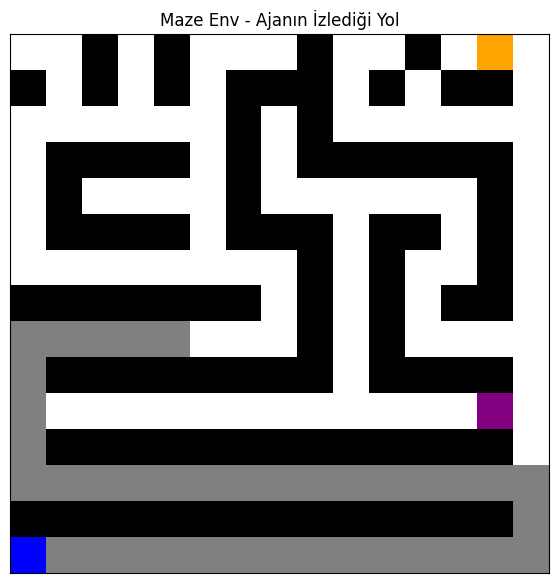

Test tamamlandı. Total reward: 63
Reward: 63

📦 Test 4


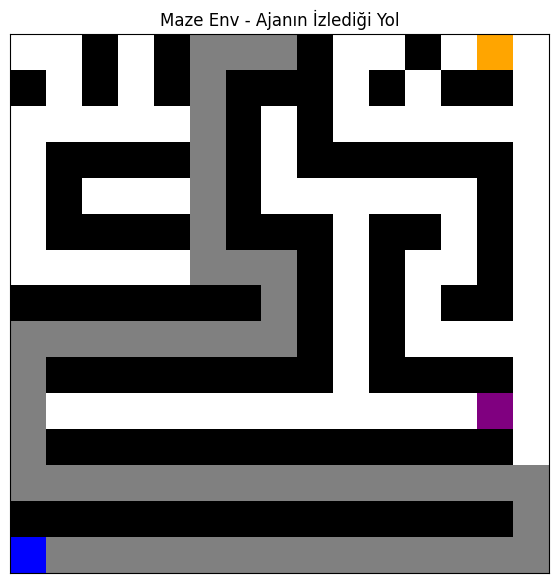

Test tamamlandı. Total reward: 48
Reward: 48

📦 Test 5


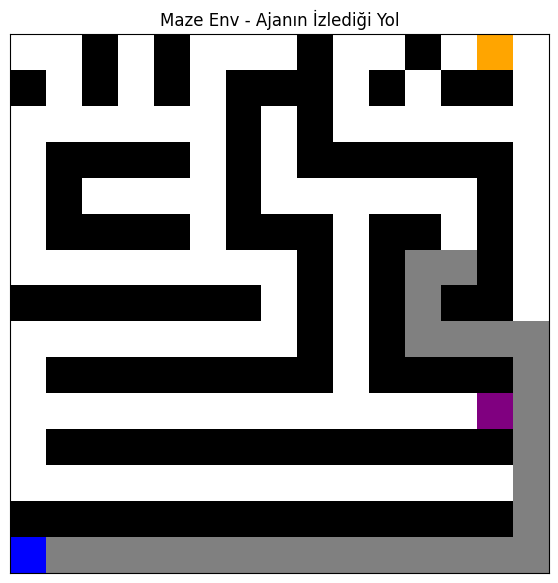

Test tamamlandı. Total reward: 75
Reward: 75


In [11]:
for i in range(5):
    print(f"\n📦 Test {i+1}")
    test_reward, test_path = test_agent(env, q_table, render=True)
    print(f"Reward: {test_reward}")
